In [0]:
import pandas as pd
import numpy as np

**Reading SAS Files**

In [0]:
#df1=pd.read_sas('comclas.sas7bdat')         # (8, 2)
#df2=pd.read_sas('commaint.sas7bdat')        # (30, 2)
#df3=pd.read_sas('commediu.sas7bdat')        # (16, 2)
#df4=pd.read_sas('communication.sas7bdat')   # (763569, 7)
#df5=pd.read_sas('extrel.sas7bdat')          # (26689, 4)
#df6=pd.read_sas('extrelty.sas7bdat')        # (26, 2)
#df7=pd.read_sas('nameaddr.sas7bdat')        # (24186, 4)
#df8=pd.read_sas('payhistory.sas7bdat')      # (1205720, 6)

**Converting to CSV file for reading to Google Colab**

In [0]:
#df1.to_csv('comclas.csv')
#df2.to_csv('commaint.csv')
#df3.to_csv('commediu.csv')
#df4.to_csv('communication.csv')
#df5.to_csv('extrel.csv')
#df6.to_csv('extrelty.csv')
#df7.to_csv('nameaddr.csv')
#df8.to_csv('payhistory.csv')

**Reading Converted CSV Files to Google Colab**

In [2]:
from google.colab import files
import io

uploaded=files.upload()
df11=pd.read_csv(io.StringIO(uploaded['comclas.csv'].decode('utf-8')),index_col=0)

uploaded=files.upload()
df21=pd.read_csv(io.StringIO(uploaded['commaint.csv'].decode('utf-8')),index_col=0)

uploaded=files.upload()
df31=pd.read_csv(io.StringIO(uploaded['commediu.csv'].decode('utf-8')),index_col=0)

uploaded=files.upload()
df41=pd.read_csv(io.StringIO(uploaded['communication.csv'].decode('utf-8')),index_col=0)

Saving comclas.csv to comclas.csv


Saving commaint.csv to commaint.csv


Saving commediu.csv to commediu.csv


Saving communication.csv to communication.csv


In [4]:
uploaded=files.upload()
df51=pd.read_csv(io.StringIO(uploaded['extrel.csv'].decode('utf-8')),index_col=0)

uploaded=files.upload()
df61=pd.read_csv(io.StringIO(uploaded['extrelty.csv'].decode('utf-8')),index_col=0)

uploaded=files.upload()
df71=pd.read_csv(io.StringIO(uploaded['nameaddr.csv'].decode('utf-8')),index_col=0)

uploaded=files.upload()
df81=pd.read_csv(io.StringIO(uploaded['payhistory.csv'].decode('utf-8')),index_col=0)

Saving extrel.csv to extrel (1).csv


Saving extrelty.csv to extrelty (1).csv


Saving nameaddr.csv to nameaddr (1).csv


Saving payhistory.csv to payhistory (1).csv


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
#  Making copy of the datasets

df1=pd.DataFrame.copy(df11)
df2=pd.DataFrame.copy(df21)
df3=pd.DataFrame.copy(df31)
df4=pd.DataFrame.copy(df41)
df5=pd.DataFrame.copy(df51)
df6=pd.DataFrame.copy(df61)
df7=pd.DataFrame.copy(df71)
df8=pd.DataFrame.copy(df81)

**Merging Tables**

In [0]:
df4=pd.merge(df4,df1,how='left',on='CLASCODE')
df4=pd.merge(df4,df2,how='left',on='MNTOPCODE')
df4=pd.merge(df4,df3,how='left',on='MEDIUMCODE')

In [0]:
# Removing duplicates in df4

tmp=df4.sort_values(['EXTRELNO','CONTDATE'])
tmp=tmp.drop_duplicates(['EXTRELNO'],keep='last')
df4=pd.DataFrame.copy(tmp)

In [0]:
#Removing duplicates from df5

tmp=df5.sort_values(['EXTRELNO','EXTRELSTDT'])
tmp=tmp.drop_duplicates(['EXTRELNO'],keep='last')
df5=pd.DataFrame.copy(tmp)

In [0]:
#Removing duplicates from df8

tmp=df8.sort_values(['EXTRELNO','PDATE'])
tmp=tmp.drop_duplicates(['EXTRELNO'],keep='last')
df8=pd.DataFrame.copy(tmp)

In [0]:
#Creating New variables with df8

tmp1=df8.groupby('EXTRELNO').sum()
tmp1=tmp1.iloc[:,1]

df8['total_donation']=0

for i in tmp1.index:
  df8['total_donation']=np.where(df8['EXTRELNO']==i,tmp1[i],df8['total_donation'])

In [0]:
df5=pd.merge(df5,df6,how='left',on='EXRELACTCD')
df=pd.merge(df7,df5,how='inner',on='EXTRELNO')
df=pd.merge(df,df4,how='left',on='EXTRELNO')
df=pd.merge(df,df8,how='inner',on='EXTRELNO')

In [12]:
df.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE,EXRELACTCD,EXTRELSTDT,EXRELDATEN,EXRELACTDE,CONTID,MEDIUMCODE,...,CONTDATE,CLASDESC,MNTOPDESC,MEDIUMDESC,PID,PDATE,PAMT,PAYTYPECD,STATUS,total_donation
0,b'0026414',b'MW',b'8300',b'NL',b'CT',1995-02-02,NaN,b'Contributor',b'005165396',b'CI',...,2007-01-10,b'CTS-item',b'Communication Tracking System',NaN,5086513.0,2007-01-17,25.00,b'D',b'OK',25.00
1,b'0026419',b'HM',b'2600',b'NL',b'FP',1992-03-01,NaN,b'CommitmentDo',b'005057036',b'CI',...,2006-07-19,b'CTS-item',b'Communication Tracking System',NaN,5074662.0,2007-01-02,75.00,b'E',b'OK',75.00
2,b'0026424',b'MW',b'1932',b'NL',b'FP',1992-03-01,1996-12-24,b'CommitmentDo',b'001855168',b'LE',...,1997-06-30,b'Information delivery',b'Change in information Relation',b'Letters',1088282.0,1997-01-02,20.33,b'O',b'OK',20.33
3,b'0026430',b'HM',b'2040',b'NL',b'CT',1997-03-07,NaN,b'Contributor',b'004978998',b'LE',...,2006-03-16,b'Acknowledgement',b'Discontinuations',b'Letters',4642081.0,2005-10-18,23.00,b'D',b'OK',23.00
4,b'0026431',b'FA',b'8520',b'NL',b'CT',1999-12-01,NaN,b'Contributor',b'005103246',b'CI',...,2006-10-05,b'CTS-item',b'Communication Tracking System',NaN,4837059.0,2006-04-28,276.00,b'E',b'OK',276.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10854
Data columns (total 23 columns):
EXTRELNO          10855 non-null object
NAME1TITLE        10591 non-null object
POSTCODE          10809 non-null object
LANGUACODE        10855 non-null object
EXRELACTCD        10855 non-null object
EXTRELSTDT        10855 non-null object
EXRELDATEN        3374 non-null object
EXRELACTDE        10855 non-null object
CONTID            10781 non-null object
MEDIUMCODE        10781 non-null object
MNTOPCODE         10781 non-null object
CLASCODE          10781 non-null object
CONTDIREC         10781 non-null object
CONTDATE          10781 non-null object
CLASDESC          10781 non-null object
MNTOPDESC         10781 non-null object
MEDIUMDESC        4667 non-null object
PID               10855 non-null float64
PDATE             10855 non-null object
PAMT              10855 non-null float64
PAYTYPECD         10674 non-null object
STATUS            10855 non-null object
total_donat

In [0]:
# Removing letter b from the data

def brem(i):
  for j in range(df.shape[0]):
    nu=df[i].isnull()
    if(nu[j]==False):
      a,b,c=df.loc[j,i].split("'")
      df.loc[j,i]=b

brem('EXTRELNO')
brem('NAME1TITLE')
brem('POSTCODE')
brem('LANGUACODE')
brem('MEDIUMCODE')
brem('CLASCODE')
brem('CONTDIREC')
brem('MNTOPCODE')
brem('EXRELACTCD')
brem('STATUS')
brem('PAYTYPECD')


__Data Preparation__

In [0]:
# Converting dates to datetime

df['CONTDATE']=pd.to_datetime(df['CONTDATE'],format='%Y-%m-%d')
df['EXTRELSTDT']=pd.to_datetime(df['EXTRELSTDT'],format='%Y-%m-%d')
df['EXRELDATEN']=pd.to_datetime(df['EXRELDATEN'],format='%Y-%m-%d')
df['PDATE']=pd.to_datetime(df['PDATE'],format='%Y-%m-%d')

In [0]:
# Assigning missing variable as unk category

df['CLASCODE']=np.where(df['CLASCODE'].isnull(),'unk',df['CLASCODE'])

# Replacing missing variable with mode value

df['CONTDIREC']=df['CONTDIREC'].fillna(df['CONTDIREC'].mode()[0])
df['MEDIUMCODE']=df['MEDIUMCODE'].fillna(df['MEDIUMCODE'].mode()[0])
df['MNTOPCODE']=df['MNTOPCODE'].fillna(df['MNTOPCODE'].mode()[0])
df['NAME1TITLE']=df['NAME1TITLE'].fillna(df['NAME1TITLE'].mode()[0])
df['PAYTYPECD']=df['PAYTYPECD'].fillna(df['PAYTYPECD'].mode()[0])
 
# Dropping Variables with high missing value

df.drop(['CLASDESC','EXRELACTDE','MEDIUMDESC','MNTOPDESC','PAMT','PID','CONTID'],axis=1,inplace=True)

# Replaceing nans in date with high value

df['CONTDATE']=df['CONTDATE'].fillna(pd.to_datetime('2099-01-01'))
df['EXRELDATEN']=df['EXRELDATEN'].fillna(pd.to_datetime('2099-01-01'))

#Replacing nan in postcode with 0

df['POSTCODE']=df['POSTCODE'].fillna(0)

In [0]:
#Creating output variable Churn

tmp=df[(df['EXTRELSTDT']<pd.to_datetime('2006-01-01')) & (df['EXRELDATEN']>=pd.to_datetime('2006-01-01'))]
tmp=tmp[tmp['EXRELACTCD']=='FP']
tmp['churn']=np.where((tmp['EXTRELSTDT']<pd.to_datetime('2006-01-01')) & 
                      (tmp['EXRELDATEN']>=pd.to_datetime('2006-01-01')) &
                      (tmp['EXRELDATEN']<=pd.to_datetime('2007-02-01')),1,0)
df=pd.DataFrame.copy(tmp)
df.drop('EXRELACTCD',axis=1,inplace=True)

In [0]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

lc=LabelEncoder()
df['CONTDIREC']=lc.fit_transform(df['CONTDIREC'])
df['LANGUACODE']=lc.fit_transform(df['LANGUACODE'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


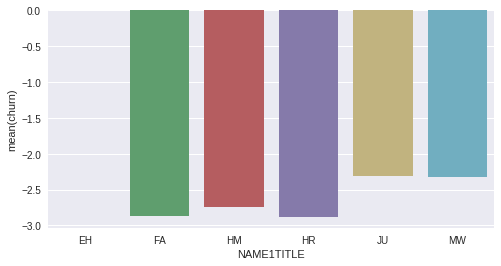

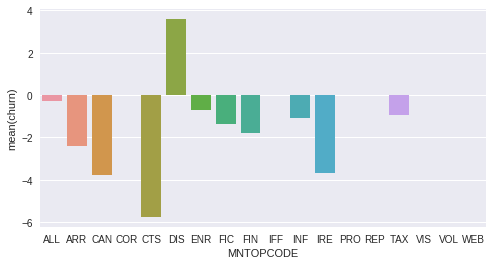

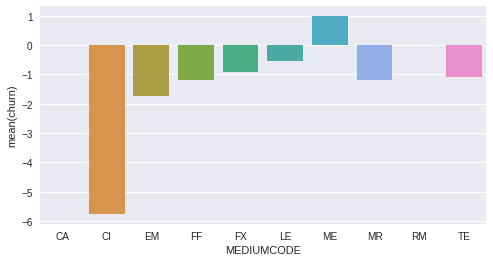

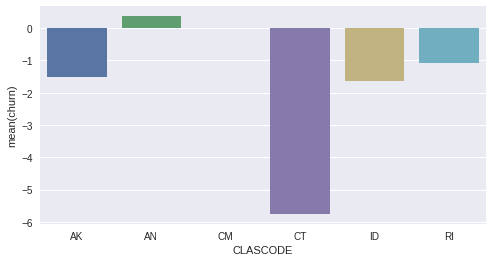

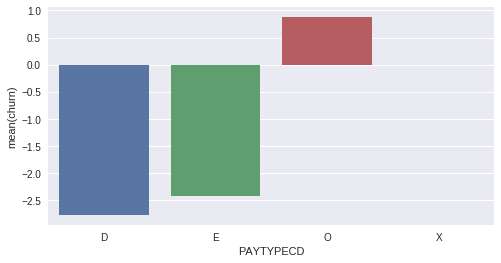

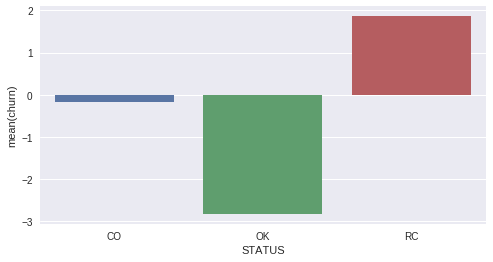

In [19]:
# Checking Loglikelihood to reduce categorical variables

import matplotlib.pyplot as plt
import seaborn as sns

num_var=['NAME1TITLE','MNTOPCODE','MEDIUMCODE','CLASCODE','PAYTYPECD','STATUS']
for num in num_var:
    logod = df.groupby(num)['churn'].sum() / (df.groupby(num)['churn'].count()-df.groupby(num)['churn'].sum())
    logod = np.log(logod)
    plt.subplots(figsize=(8,4))
    sns.barplot(x=logod.index,y=logod)

In [0]:
# Combining Categorical Variables

df['NAME1TITLE']=np.where((df['NAME1TITLE']=='FA')|(df['NAME1TITLE']=='HM')|(df['NAME1TITLE']=='HR'),'FA_HM_HR',
                         np.where((df['NAME1TITLE']=='JU')|(df['NAME1TITLE']=='MW'),'JU_MW','EH'))

df['MNTOPCODE']=np.where((df['MNTOPCODE']=='FIC')|(df['MNTOPCODE']=='INF') | 
                         (df['MNTOPCODE']=='TAX')|(df['MNTOPCODE']=='FIN'),'FC_FN_IN_TA',
                        np.where((df['MNTOPCODE']=='ARR')|(df['MNTOPCODE']=='CAN')|(df['MNTOPCODE']=='IRE'),'AR_CAN_IRE',
                                 np.where((df['MNTOPCODE']=='ALL')|(df['MNTOPCODE']=='ENR'),'AL_EN',
                                         np.where(df['MNTOPCODE']=='DIS','DIS',
                                                 np.where(df['MNTOPCODE']=='CTS','CTS','Others')))))

df['MEDIUMCODE']=np.where((df['MEDIUMCODE']=='EM')|(df['MEDIUMCODE']=='FF')|(df['MEDIUMCODE']=='MR')|(df['MEDIUMCODE']=='TE'),'EM_FF_MR_TE',
                         np.where((df['MEDIUMCODE']=='FX')|(df['MEDIUMCODE']=='LE'),'FX_LE',
                                 np.where(df['MEDIUMCODE']=='CI','CI',
                                         np.where(df['MEDIUMCODE']=='ME','ME','Others'))))

df['CLASCODE']=np.where((df['CLASCODE']=='AK')|(df['CLASCODE']=='ID')|(df['CLASCODE']=='RI'),'AK_ID_RI',
                       np.where(df['CLASCODE']=='AN','AN',
                               np.where(df['CLASCODE']=='CT','CT','CM')))

In [0]:
def ohe(i,df):
  col=pd.get_dummies(df[i],prefix=i)
  col=col.drop(col.columns[0],axis=1)
  df=pd.concat([df,col],axis=1)
  df.drop(i,axis=1,inplace=True)
  return df
  
df=ohe('NAME1TITLE',df)
df=ohe('MNTOPCODE',df)
df=ohe('MEDIUMCODE',df)
df=ohe('CLASCODE',df)
df=ohe('PAYTYPECD',df)
df=ohe('STATUS',df)

In [0]:
# Converting Postcode to frequency

t=df['POSTCODE'].value_counts()
for i in t.index:
  df['POSTCODE']=np.where(df['POSTCODE']==i,t[i],df['POSTCODE'])
  
df=df.reset_index(drop=True)

In [0]:
#Converting Datetime variable to ordinal


for i in range(df.shape[0]):
  df.loc[i,'EXTRELSTDT']=df.loc[i,'EXTRELSTDT'].toordinal()
  df.loc[i,'EXRELDATEN']=df.loc[i,'EXRELDATEN'].toordinal()
  df.loc[i,'CONTDATE']=df.loc[i,'CONTDATE'].toordinal()
  df.loc[i,'PDATE']=df.loc[i,'PDATE'].toordinal()
  
df=df.set_index('EXTRELNO')

In [24]:
myfor='churn~'+'+'.join(df.columns.difference(['churn']))
print(myfor)

churn~CLASCODE_AN+CLASCODE_CM+CLASCODE_CT+CONTDATE+CONTDIREC+EXRELDATEN+EXTRELSTDT+LANGUACODE+MEDIUMCODE_EM_FF_MR_TE+MEDIUMCODE_FX_LE+MEDIUMCODE_ME+MEDIUMCODE_Others+MNTOPCODE_AR_CAN_IRE+MNTOPCODE_CTS+MNTOPCODE_DIS+MNTOPCODE_FC_FN_IN_TA+MNTOPCODE_Others+NAME1TITLE_FA_HM_HR+NAME1TITLE_JU_MW+PAYTYPECD_E+PAYTYPECD_O+PAYTYPECD_X+PDATE+POSTCODE+STATUS_OK+STATUS_RC+total_donation


In [25]:
# Removing Variables with high VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(myfor, df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)

,VIF Factor,features
0,220584792.1,Intercept
1,1.7,POSTCODE[T.2]
2,1.6,POSTCODE[T.3]
3,1.9,POSTCODE[T.4]
4,1.8,POSTCODE[T.5]
5,2.2,POSTCODE[T.6]
6,2.4,POSTCODE[T.7]
7,2.1,POSTCODE[T.8]
8,2.1,POSTCODE[T.9]
9,2.3,POSTCODE[T.10]


In [26]:
df.drop(['CLASCODE_CT','CONTDIREC','EXRELDATEN','MEDIUMCODE_FX_LE','MNTOPCODE_AR_CAN_IRE','MNTOPCODE_CTS',
        'NAME1TITLE_FA_HM_HR','NAME1TITLE_JU_MW','STATUS_OK','STATUS_RC'],axis=1,inplace=True)
myfor='churn~'+'+'.join(df.columns.difference(['churn']))
print(myfor)

churn~CLASCODE_AN+CLASCODE_CM+CONTDATE+EXTRELSTDT+LANGUACODE+MEDIUMCODE_EM_FF_MR_TE+MEDIUMCODE_ME+MEDIUMCODE_Others+MNTOPCODE_DIS+MNTOPCODE_FC_FN_IN_TA+MNTOPCODE_Others+PAYTYPECD_E+PAYTYPECD_O+PAYTYPECD_X+PDATE+POSTCODE+total_donation


In [27]:
df.head()

,POSTCODE,LANGUACODE,EXTRELSTDT,CONTDATE,PDATE,total_donation,churn,MNTOPCODE_DIS,MNTOPCODE_FC_FN_IN_TA,MNTOPCODE_Others,MEDIUMCODE_EM_FF_MR_TE,MEDIUMCODE_ME,MEDIUMCODE_Others,CLASCODE_AN,CLASCODE_CM,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X
EXTRELNO,,,,,,,,,,,,,,,,,,
0026419,33,1,727258,732511,732678,75.0,0,0,0,0,0,0,0,0,0,1,0,0
0026443,6,1,727258,732659,732693,25.0,0,0,0,0,0,0,0,0,0,0,0,0
0026444,33,1,727258,732483,732693,25.0,0,0,0,0,0,0,0,0,0,0,0,0
0026446,11,1,727258,732551,732693,75.0,0,0,0,0,0,0,0,0,0,0,0,0
0026470,33,1,727258,732686,732693,71.0,0,0,0,0,0,0,0,0,0,0,0,0


__Data Modelling__

In [0]:
# Seperating Output variable

y=df['churn']
df.drop('churn',axis=1,inplace=True)

In [0]:
# Splitting data into test and train

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=0)

__Model 1: LogisticRegression__

In [63]:
# Importing Logistic Regresion and fitting the data

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=0,penalty='l1',C=100)
model.fit(x_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
# Predicting Output

ypred=model.predict(x_test)

In [0]:
#Validating Output

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score


cv_acc=cross_val_score(estimator=model,X=x_train,y=y_train,cv=10)
cm=confusion_matrix(y_test,ypred)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test,ypred)
acc1=f1_score(y_test,ypred,average='binary')
auc = roc_auc_score(y_test,ypred)
aps=average_precision_score(y_test,ypred)

In [66]:
# Printing Output

print('Confusion Matrix\n',cm)
print('\nCross Validation Score\n',cv_acc)
print('\nTesting Accuracy\n',acc)
print('\nF1 Score\n',acc1)
print('\nAUC\n',auc)
print('\nAverage Precision Score\n',aps)

Confusion Matrix
 [[1011    9]
 [  11   58]]

Cross Validation Score
 0.9832284087314141

Testing Accuracy
 0.9816345270890725

F1 Score
 0.8529411764705882

AUC
 0.9158780903665814

Average Precision Score
 0.73776702783841


__Model 2: Random Forest__

In [109]:
from sklearn.ensemble import RandomForestClassifier

model1=RandomForestClassifier(random_state=123,n_jobs=-1,n_estimators=60,max_depth=4,min_samples_split=10)
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [0]:
#Predicting output

ypred1=model1.predict(x_test)

In [0]:
#Validating Output

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score


cv_acc=cross_val_score(estimator=model1,X=x_train,y=y_train,cv=5)
cm=confusion_matrix(y_test,ypred1)
cv_acc=cv_acc.mean()
acc=accuracy_score(y_test,ypred1)
acc1=f1_score(y_test,ypred1,average='binary')
auc = roc_auc_score(y_test,ypred1)
aps=average_precision_score(y_test,ypred1)

In [112]:
# Printing Output

print('Confusion Matrix\n',cm)
print('\nCross Validation Score\n',cv_acc)
print('\nTesting Accuracy\n',acc)
print('\nF1 Score\n',acc1)
print('\nAUC\n',auc)
print('\nAverage Precision Score\n',aps)

Confusion Matrix
 [[1017    3]
 [   6   63]]

Cross Validation Score
 0.9917296805099172

Testing Accuracy
 0.9917355371900827

F1 Score
 0.9333333333333332

AUC
 0.9550511508951407

Average Precision Score
 0.8770511438495628


__Hence we will use RandomForest Classifier over Logistic Regression as Random Forest provides better area under the curve, F1 score and better accuracy, moreover Logistic Regression is  slightly overfitting the data. Therefore we consider the Random Forest Calssifier as our model for analysis.__